In [1127]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import timedelta
import statistics as stats

Asignación 2

Nathalia Alexandra Perez Rojas 

2200023

Pm25 esta medido en ug/m3

Los intervalos se definieron como: $a_{i}$ + $Δ(x)$ = $b_{i}$

$a_{i}$=00:00 am 

$\Delta(x)$= 4 horas

$b_{i}$ = 4:00 am

La tolerancia aceptable en de 20%


Lo primero es crear los vectores con los valores dados en excel, seguido de esto, calcular la distancia entre ellos.

In [1128]:
nov = pd.read_excel('Noviembre 2018.xlsx', usecols=("A:C"))

dic = pd.read_excel('DICIEMBRE 2018 EXP.xlsx',usecols=("A:c"))

abr = pd.read_excel('abril 2019.xlsx',usecols=("A:c"))


junio = pd.read_excel('JUNIO 2019.xlsx',usecols=("A:C"))


julio= pd.read_excel('julio 2019.xlsx',usecols=("A:C"))

In [1129]:
t_n = np.array(nov['t'])

In [1130]:
x2 = np.array(nov['valor exp'])

In [1131]:
x1 = np.array(nov['valor teo'])

In [1132]:
X = np.sqrt((x1-x2)**2)

In [1133]:
Tolera = (X/720.001)*38
stats.mean(Tolera)

0.196428297253534

Los valores anteriores son las distancias que hay entre los valores teóricos y experimentales de $Pm_{25}$ en Noviembre de 2018

In [1134]:
t=np.array(dic['fecha_hora_med'])

In [1135]:
d1 = np.array(dic['valor teo'])

In [1136]:
d2 = np.array(dic['valor exp'])

In [1137]:
d = np.sqrt((d1-d2)**2)
Tolera_d = (d/720.001)*82
stats.mean(Tolera_d)

0.6848998455609974

Los valores anteriores son las distancias que hay entre los valores teóricos y experimentales de $Pm_{25}$ en Diciembre de 2018

In [1138]:
t_a=np.array(abr['date'])

In [1139]:
a1 = np.array(abr['valor exp'])

In [1140]:
a2 = np.array(abr['valor teo'])

In [1141]:
a = np.sqrt((a1-a2)**2)
Tolera_a = (a/720.001)*98
stats.mean(Tolera_a)

0.7776030720344254

Los valores anteriores son las distancias que hay entre los valores teóricos y experimentales de $Pm_{25}$ en Abril de 2019

In [1142]:
t_jn = np.array(junio['fecha_hora_med'])

In [1143]:
j2 = np.array(junio['valor exp'])

In [1144]:
j1=np.array(junio['valor teo'])

In [1145]:
J = np.sqrt((j1-j2)**2)
Tolera_j = (J/720.001)*174
stats.mean(Tolera_j)

1.0579479572463344

Los valores anteriores son las distancias que hay entre los valores teóricos y experimentales de $Pm_{25}$ en Junio de 2019

In [1146]:
t_jl = np.array(julio['tiempo'])


jl1 = np.array(julio['valor teo'])
jl2 = np.array(julio['valor exp'])
Jl = np.sqrt((jl1-jl2)**2)

Tolera_jl = (Jl/720.001)*182
stats.mean(Tolera_jl)

1.137886604601702

Los valores anteriores son las distancias que hay entre los valores teóricos y experimentales de $Pm_{25}$ en Julio de 2019

Graficando los valores anteriores y encontrando su aproximación lineal por medio del método de mínimos cuadrados quedaría:

In [1147]:
n = np.dot(x1,x2)/np.dot(x1,x1) 
N = stats.mean(x2)-n*stats.mean(x1) 

n2 = np.dot(x1,x2)/np.dot(x2,x2) 
N2 = stats.mean(x1)-n*stats.mean(x2)  


def f(x):
  f1=n*x+N
  return f1

def g(x):
  g1=n2*x+N2
  return g1

In [1148]:
f = f(x1)
f2 =g(x2)

In [1149]:
z = f*f2

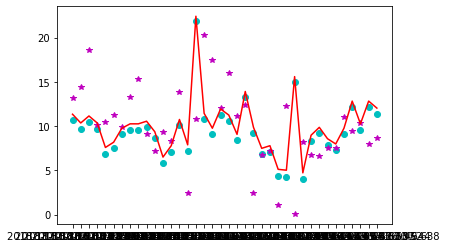

In [1150]:
plt.plot(t_n,x1,'co')
plt.plot(t_n,x2,'m*')
plt.plot(f,'r-')
    
#grafica de los puntos en noviembre del 2018, los azules son los teoricos y los morados son los expermintales,con su respectiva aproximación lineal.


In [1151]:
i= np.dot(d1,d2)/np.dot(d1,d1)
I = stats.mean(d1)-i*stats.mean(d2)  

def Y(x):
  i0= i*x+I
  return i0


i2= np.dot(d2,d1)/np.dot(d2,d2)
I2 = stats.mean(d2)-i2*stats.mean(d1) 

def y(x):
  i3= i2*x+I2
  return i3

In [1152]:
q1 = Y(d1)
Q=y(d2)

z0 = q1/Q

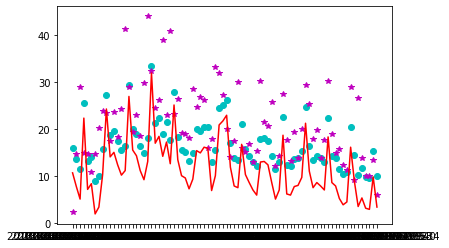

In [1153]:
plt.plot(t,d1,'co')
plt.plot(t,d2,'m*')
plt.plot(q1,'r-')
#grafica de los puntos en Diciembre del 2018, los azules son los teóricos y los morados son los experimentales, con su respectiva aproximación lineal.

In [1154]:
l= np.dot(a1,a2)/np.dot(a1,a1)
L = stats.mean(a1)-l*stats.mean(a2)  

def A(x):
  A1 = l*x+L
  return A1

A= A(a1)

l2= np.dot(a2,a1)/np.dot(a2,a2)
L2 = stats.mean(a2)-l2*stats.mean(a1)  

def A2(x):
  A3 = l2*x+L2
  return A3

Ai= A2(a2)

In [1155]:
p= A/Ai

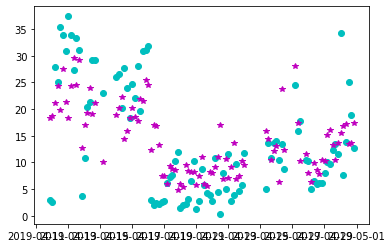

In [1156]:
plt.plot(t_a,a1,'co')
plt.plot(t_a,a2,'m*')
#grafica de los puntos en Abril del 2019, los azules son los teóricos y los morados son los experimentales, con su respectiva aproximacion lineal.

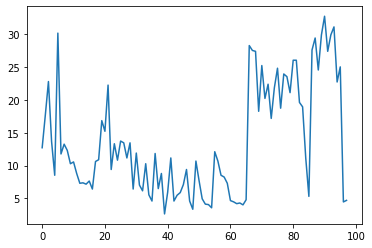

In [1157]:
plt.plot(A)

In [1158]:
u = np.dot(j1,j2)/np.dot(j1,j1)
U = stats.mean(j1)-u*stats.mean(j2)  

def o(x):
  o1 = u*x+U
  return o1

o = o(j1)

u2= np.dot(j2,j1)/np.dot(j2,j2)
U2 = stats.mean(j2)-u2*stats.mean(j1)  

def o0(x):
  o2 = u2*x+U2
  return o2

o1= o0(j2)

In [1159]:
c=o/o1

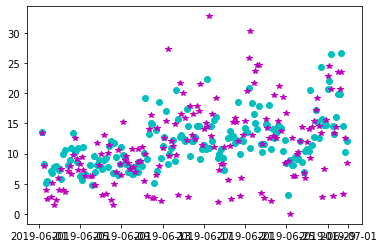

In [1160]:
plt.plot(t_jn,j1,'co')
plt.plot(t_jn,j2,'m*')
#grafica de los puntos en Junio del 2019, los azules son teóricos y los morados son los experimentales con su respectiva aproximacion lineal.

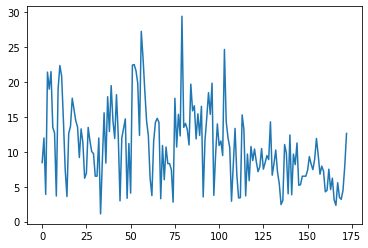

In [1161]:
plt.plot(o1)

In [1162]:
h= np.dot(jl1,jl2)/np.dot(jl1,jl1)
H= stats.mean(jl1)-h*stats.mean(jl2)  

def g(x):
  g1 = h*x+H
  return g1

G=g(jl1)

h2= np.dot(jl2,jl1)/np.dot(jl2,jl2)
H2 = stats.mean(jl2)-h2*stats.mean(jl1)  

def g0(x):
  g2 = u2*x+U2
  return g2

G2= g0(jl2)

In [1163]:
k=G/G2
k4=stats.mean(k)

Text(0.5, 0, 'tiempo')

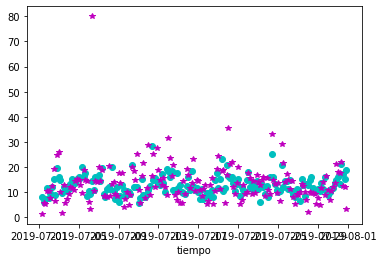

In [1164]:
plt.plot(t_jl,jl1,'co')
plt.plot(t_jl,jl2,'m*')
plt.xlabel('tiempo')

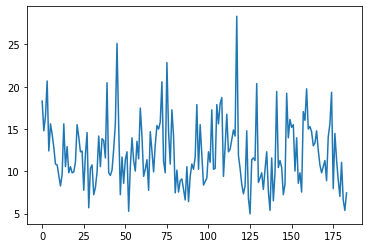

In [1165]:
plt.plot(G)